In [1]:
# firstly import the necessary libraries :

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
image_path = 'class_attendance.jpg'
image = cv2.imread(image_path,cv2.IMREAD_UNCHANGED)
print('original dimensions : ',image.shape)

# the following code is for images which need some scaling :
# scale_percent=50
# width=int(image.shape[1]*scale_percent/100)
# height=int(image.shape[0]*scale_percent/100)
# dim=(width,height)

# for this example we are not resizing the image dimensions :
resized=image
# resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

print('resized dimensions : ',resized.shape)

image_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

original dimensions :  (3024, 4032, 3)
resized dimensions :  (3024, 4032, 3)


In [3]:
# we are going to use the haar cascade classifier for face detection :

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
# convert the image to gray scale as haar cascade works in gray scale only :

gray_image = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# tune the hyperparameters such as scale factor and minNeighbours for best detection :

faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

In [5]:
# we need to adjust the size of window in cv 2 to display the image

cv2.namedWindow("output", cv2.WINDOW_NORMAL)       
cv2.resizeWindow("output", resized.shape[0],resized.shape[1])    
for (x, y, w, h) in faces:
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.imshow("output", image_rgb)
#     cv2.waitKey(0)
cv2.destroyAllWindows()
print('image_rgb dimensions : ',image_rgb.shape)

# convert the image back to RGB format and adjust the brighness and contrast after processing

final = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
final = cv2.convertScaleAbs(final, alpha=1, beta=0)  # Adjust alpha and beta as needed
print('final dimensions : ',final.shape)

# save the image with bounding boxes as image_detected.jpg
cv2.imwrite('image_detected.jpg',final)

image_rgb dimensions :  (3024, 4032, 3)
final dimensions :  (3024, 4032, 3)


True

In [6]:
folder_name = 'attendance_class'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
# List all files in the folder
file_list = os.listdir(folder_name)

face_images = []

# Iterate through the files and remove them
for file in file_list:
    file_path = os.path.join(folder_name, file)
    if os.path.isfile(file_path):
        os.remove(file_path)
        
# Save the cropped photos in the folder named attendance_class
for (x, y, w, h) in faces:
    face_crop = resized[y:y+h, x:x+w]
    face_images.append(face_crop)
    face_filename = os.path.join(folder_name, f'face_{x}_{y}.jpg')
    cv2.imwrite(face_filename, face_crop)

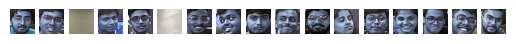

In [7]:
# Display the extracted face images

for i, face in enumerate(face_images):
    plt.subplot(1, len(face_images), i+1)
    plt.imshow(face)
    plt.axis('off')
    
plt.show()